# Introdução ao Seaborn

## Sobre os Dados
Neste notebook, estaremos trabalhando com 2 conjuntos de dados:
- Preço das ações do Facebook ao longo de 2018 (obtido usando o pacote [`stock_analysis`](https://github.com/stefmolin/stock-analysis))
- Dados de terremotos de 18 de setembro de 2018 a 13 de outubro de 2018 (obtidos do Serviço Geológico dos Estados Unidos (USGS) usando a [API do USGS](https://earthquake.usgs.gov/fdsnws/event/1/))

## Configuração

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

## Dados Categóricos
Um terremoto de magnitude 7.5 em 28 de setembro de 2018 perto de Palu, Indonésia, causou um devastador tsunami posteriormente ([fonte](https://www.livescience.com/63721-tsunami-earthquake-indonesia.html)). Vamos dar uma olhada em algumas visualizações para entender quais técnicas de magnitude (`magType`) são usadas na Indonésia, o intervalo de magnitudes lá e quantos dos terremotos são acompanhados por um tsunami.

In [2]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    'parsed_place == "Indonesia" and tsunami and mag == 7.5'
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


### `stripplot()`
A função `stripplot()` nos ajuda a visualizar dados categóricos em um eixo e dados numéricos no outro. Agora também temos a opção de colorir nossos pontos usando uma coluna dos nossos dados (com o parâmetro `hue`). Com um strip plot, podemos ver pontos para cada terremoto que foi medido com um determinado `magType` e qual foi sua magnitude; no entanto, não é muito fácil ver a densidade dos pontos devido à sobreposição:

<Axes: xlabel='magType', ylabel='mag'>

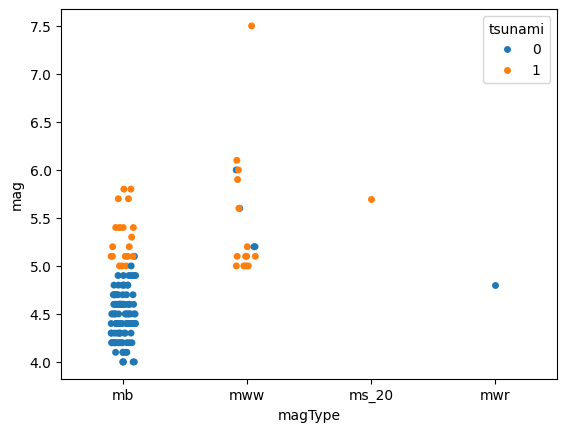

In [3]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

### `swarmplot()`
O gráfico de enxame de abelhas (`swarmplot()`) ajuda a resolver esse problema mantendo os pontos sem sobreposição. Note como podemos ver muito mais pontos para a seção azul da coluna `mb`:

<Axes: xlabel='magType', ylabel='mag'>

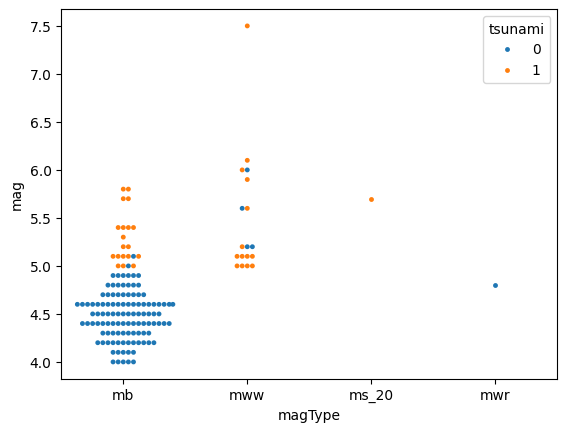

In [6]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
    size=3.5 # point size
)

### `boxenplot()`
A função `boxenplot()` cria um gráfico de caixa aprimorado que mostra quantis adicionais:

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

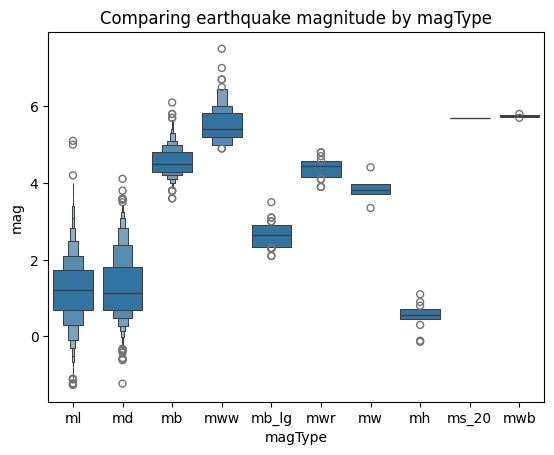

In [7]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.title('Comparing earthquake magnitude by magType')

*Leia mais sobre esse tipo de gráfico neste artigo: [Letter-value plots: Boxplots for large data](https://vita.had.co.nz/papers/letter-value-plot.html)*

### `violinplot()`
Os gráficos de violino combinam gráficos de caixa e estimativas de densidade kernel (KDE):

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

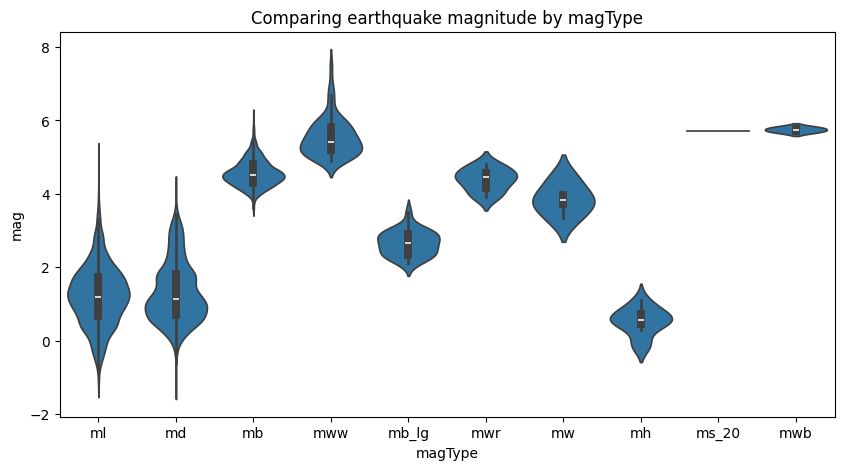

In [9]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
    ax=axes, density_norm='width' # all violins have same width
)
plt.title('Comparing earthquake magnitude by magType')

## Correlações e Mapas de Calor

### `heatmap()`
No último capítulo, vimos como criar um mapa de calor da matriz de correlação usando `pandas` e `matplotlib` (no notebook [`2-plotting_with_pandas.ipynb`](../ch_05/2-plotting_with_pandas.ipynb)). Uma forma mais fácil é usar o `seaborn`:

<Axes: >

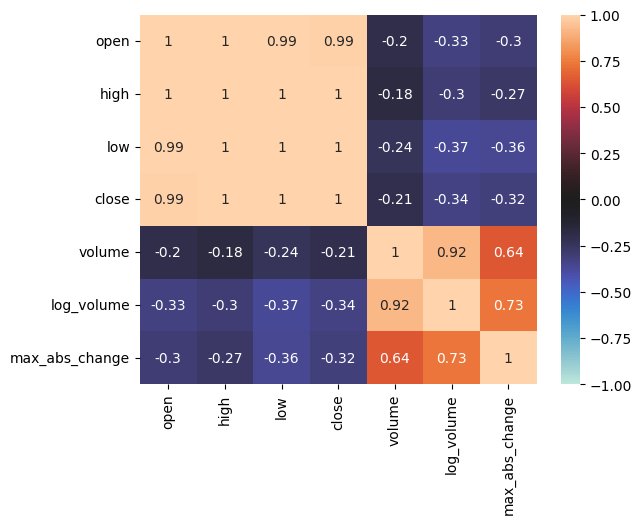

In [10]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, center=0, vmin=-1, vmax=1
)

### `pairplot()`
O pair plot é a resposta do seaborn à matriz de dispersão que vimos no capítulo 5 (`pandas.plotting.scatter_matrix()`) no notebook [`3-pandas_plotting_module.ipynb`](../ch_05/3-pandas_plotting_module.ipynb):

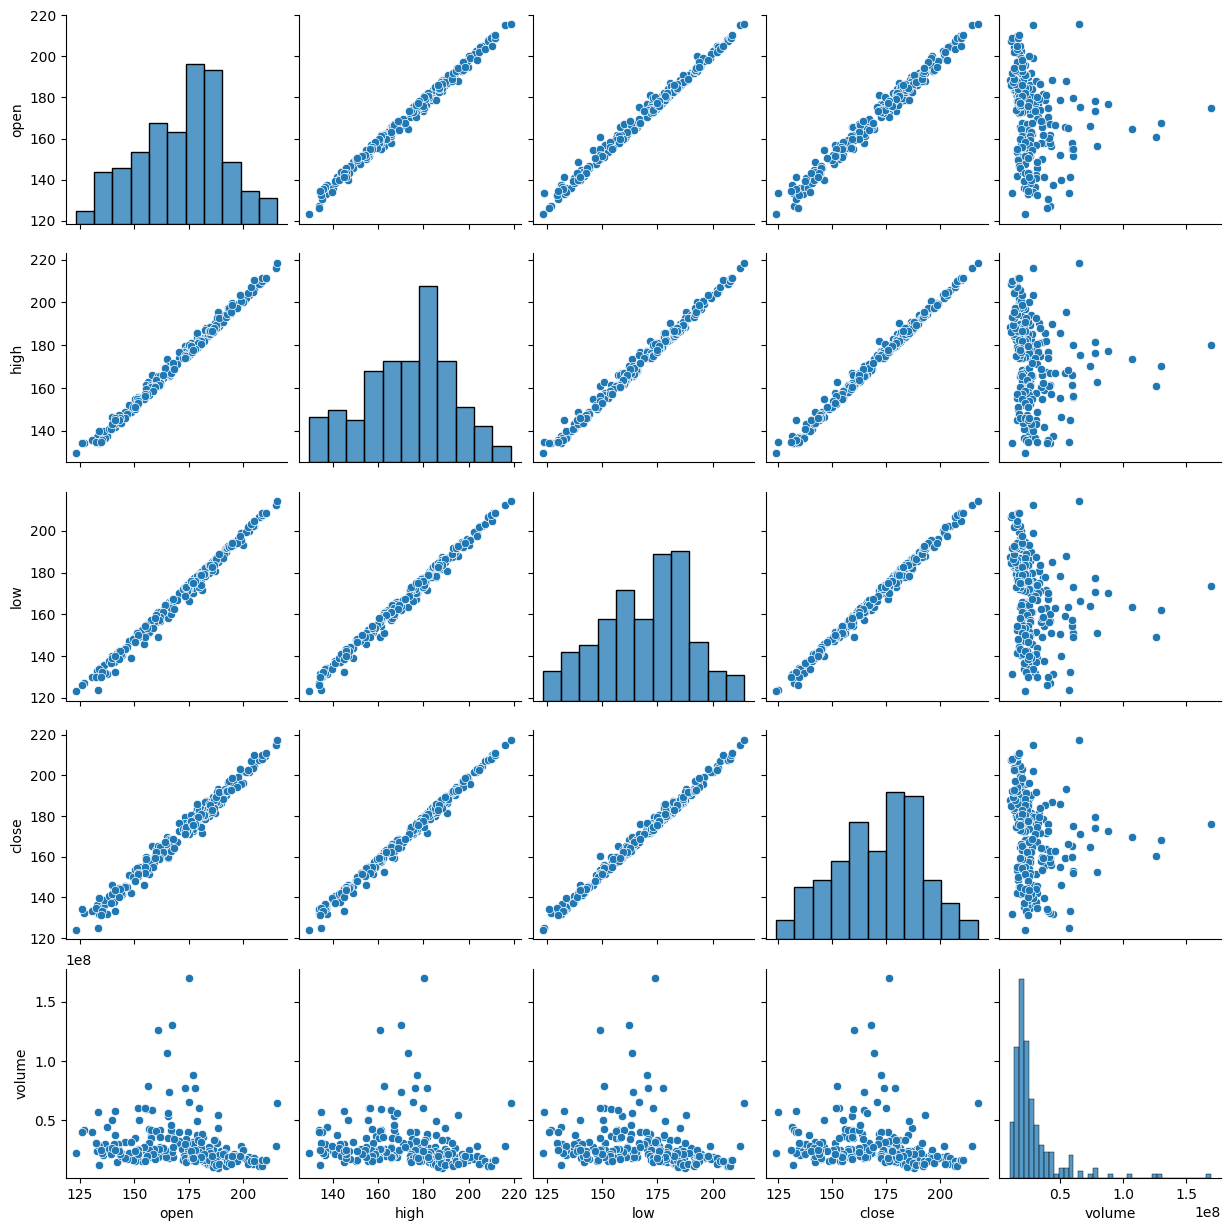

In [11]:
sns.pairplot(fb)

Assim como com o `pandas`, podemos especificar o que mostrar ao longo da diagonal; no entanto, o `seaborn` também nos permite colorir os dados com base em outra coluna (ou outros dados com o mesmo formato):

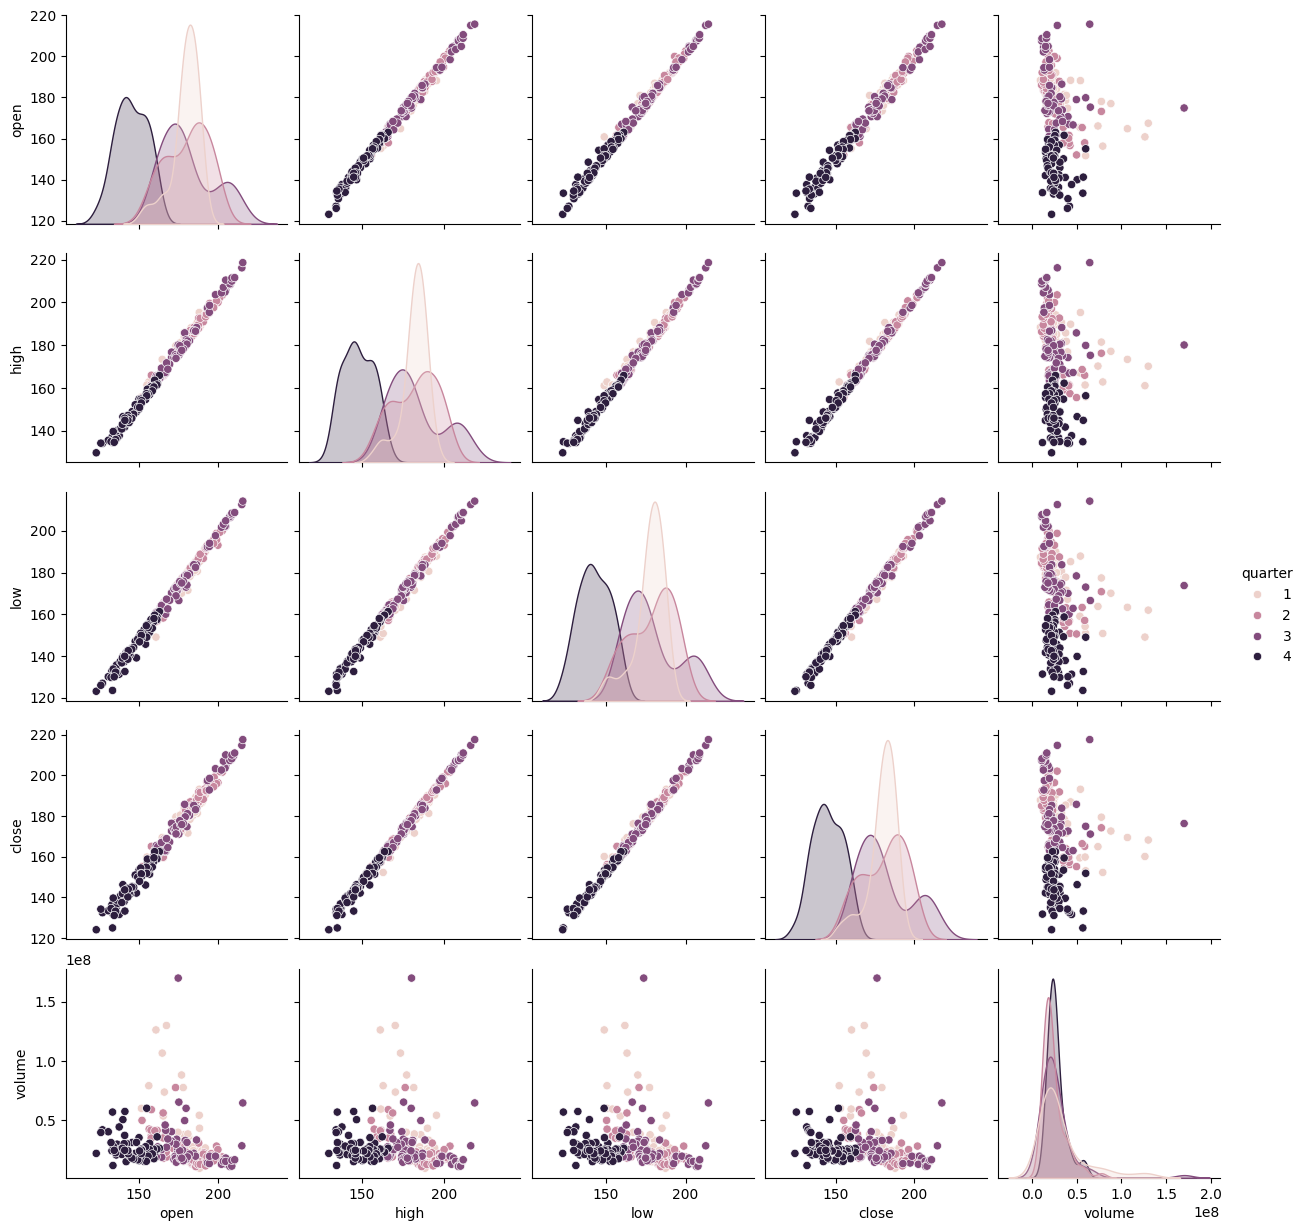

In [12]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

### `jointplot()`
O joint plot nos permite visualizar a relação entre duas variáveis, como um gráfico de dispersão. No entanto, obtemos o benefício adicional de poder visualizar suas distribuições ao mesmo tempo (como um histograma ou KDE). As opções padrão nos dão um gráfico de dispersão no centro e histogramas nos lados:

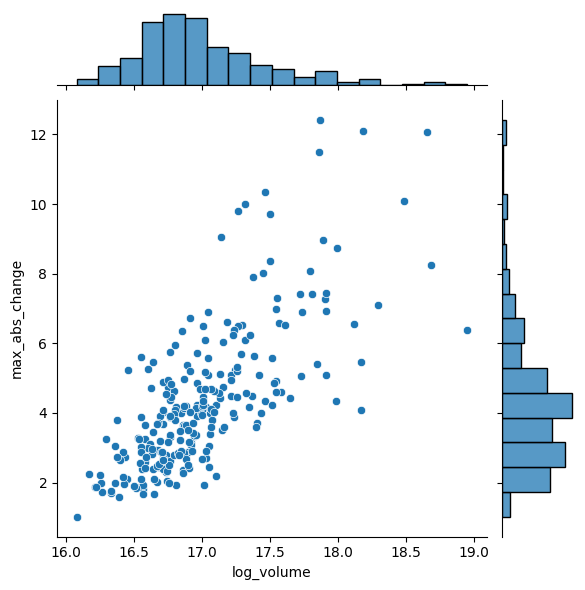

In [13]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Podemos passar `kind='hex'` para usar hexágonos (hexbins):

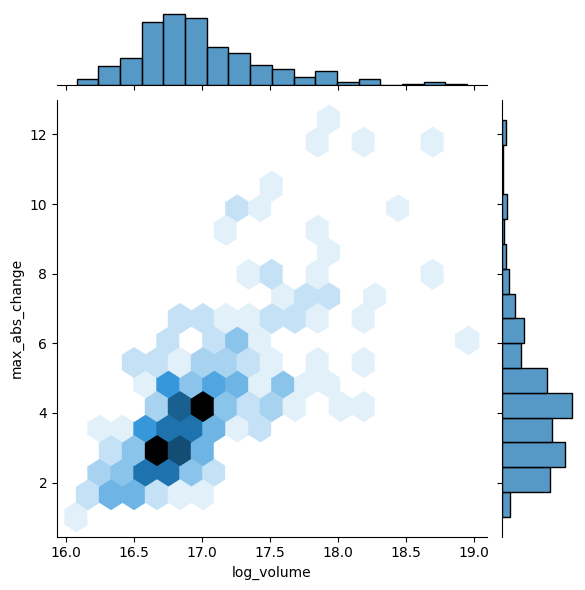

In [14]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Se passarmos `kind='kde'`, obtemos um gráfico de contorno da estimativa de densidade conjunta com KDEs ao longo dos lados:

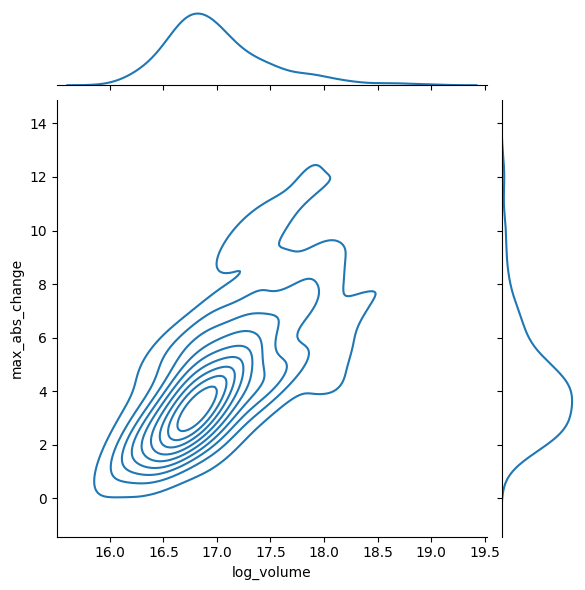

In [15]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Se especificarmos `kind='reg'` em vez disso, obtemos uma linha de regressão no centro e KDEs nos lados:

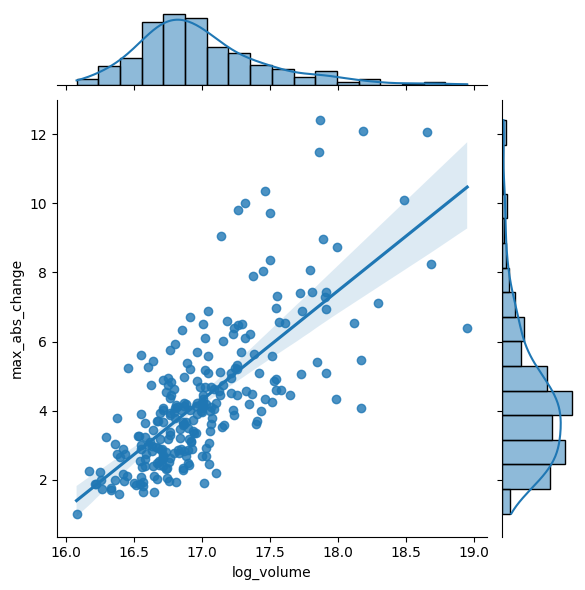

In [16]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Se passarmos `kind='resid'`, obtemos os resíduos da regressão mencionada anteriormente:

Text(37.722222222222214, 0.5, 'residuals')

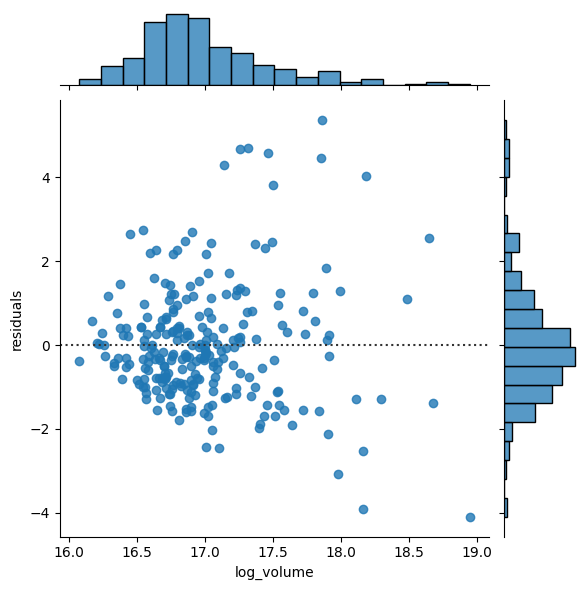

In [17]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
# update y-axis label (discussed in the next notebook)
plt.ylabel('residuals')

## Gráficos de Regressão

Vamos usar o `seaborn` para visualizar uma regressão linear entre o log do volume negociado das ações do Facebook e a mudança diária máxima absoluta (preço máximo das ações no dia - preço mínimo das ações no dia). Para isso, primeiro precisamos isolar esses dados:

In [18]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [20]:
fb_reg_data.head(2)

,log_volume,max_abs_change
date,,
2018-01-02,16.714286,4.03
2018-01-03,16.642029,3.45


Como queremos visualizar cada coluna como o regressor, precisamos analisar as permutações da sua ordem. Permutações e combinações (entre outras coisas) são facilitadas em Python com `itertools`, então vamos importá-lo:

In [21]:
import itertools

`itertools` nos fornece iteradores eficientes. Iteradores são objetos sobre os quais iteramos, esgotando-os. Este é um exemplo de iterador do `itertools`; observe como o segundo loop não faz nada:

In [23]:
iterator = itertools.repeat("I'm an iterator", 1)

for i in iterator:
    print(f'-->{i}')
print('Isso foi impresso uma vez porque o iterador foi esgotado')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
Isso foi impresso uma vez porque o iterador foi esgotado


Iteráveis são objetos que podem ser iterados. Ao entrar em um loop, um iterador é criado a partir do iterável para lidar com a iteração. Iteradores são iteráveis, mas nem todos os iteráveis são iteradores. Uma lista é um iterável. Se transformarmos esse iterador em um iterável (uma lista, neste caso), o segundo loop é executado:

In [25]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('Isso é impresso novamente porque é um iterável:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
Isso é impresso novamente porque é um iterável:
-->I'm an iterable


A função `reg_resid_plots()` do módulo `viz.py` nesta pasta utiliza `regplot()` e `residplot()` do Seaborn, junto com `itertools`, para plotar a regressão e os resíduos lado a lado:

In [27]:
import sys
from os import path
sys.path.append(path.abspath('..'))

In [29]:
from src.viz import reg_resid_plots
reg_resid_plots??

Signature: reg_resid_plots(data)
Source:   
def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    
    Parameters:
        - data: A `pandas.DataFrame`

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes
File:      ~/Documents/FIAP/Hands-On-Data-Analysis-with-Pandas-2nd-edition-pt-br/src/viz.

Let's see what the output looks like for the Facebook data we isolated:

[<Axes: xlabel='log_volume', ylabel='max_abs_change'>,
 <Axes: xlabel='log_volume', ylabel='residuals'>,
 <Axes: xlabel='max_abs_change', ylabel='log_volume'>,
 <Axes: xlabel='max_abs_change', ylabel='residuals'>]

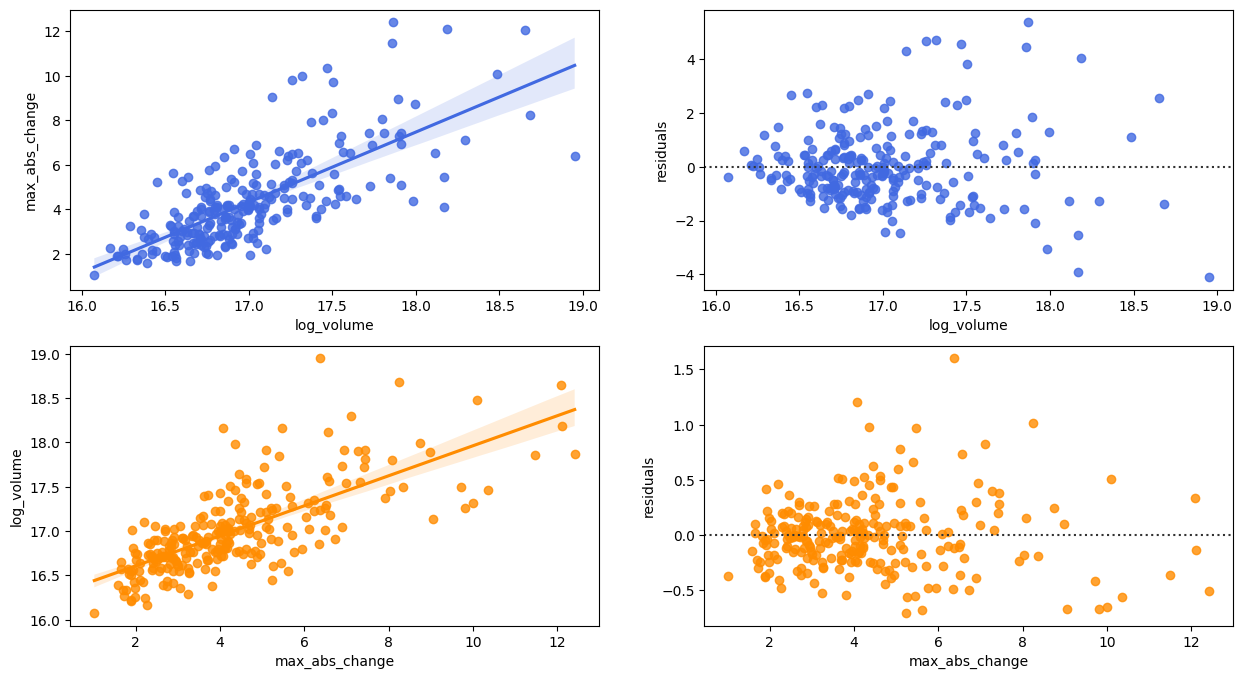

In [31]:
from src.viz import reg_resid_plots
reg_resid_plots(fb_reg_data)

Podemos usar `lmplot()` para dividir nossa regressão em subconjuntos dos nossos dados. Por exemplo, podemos realizar uma regressão por trimestre nos dados das ações do Facebook:

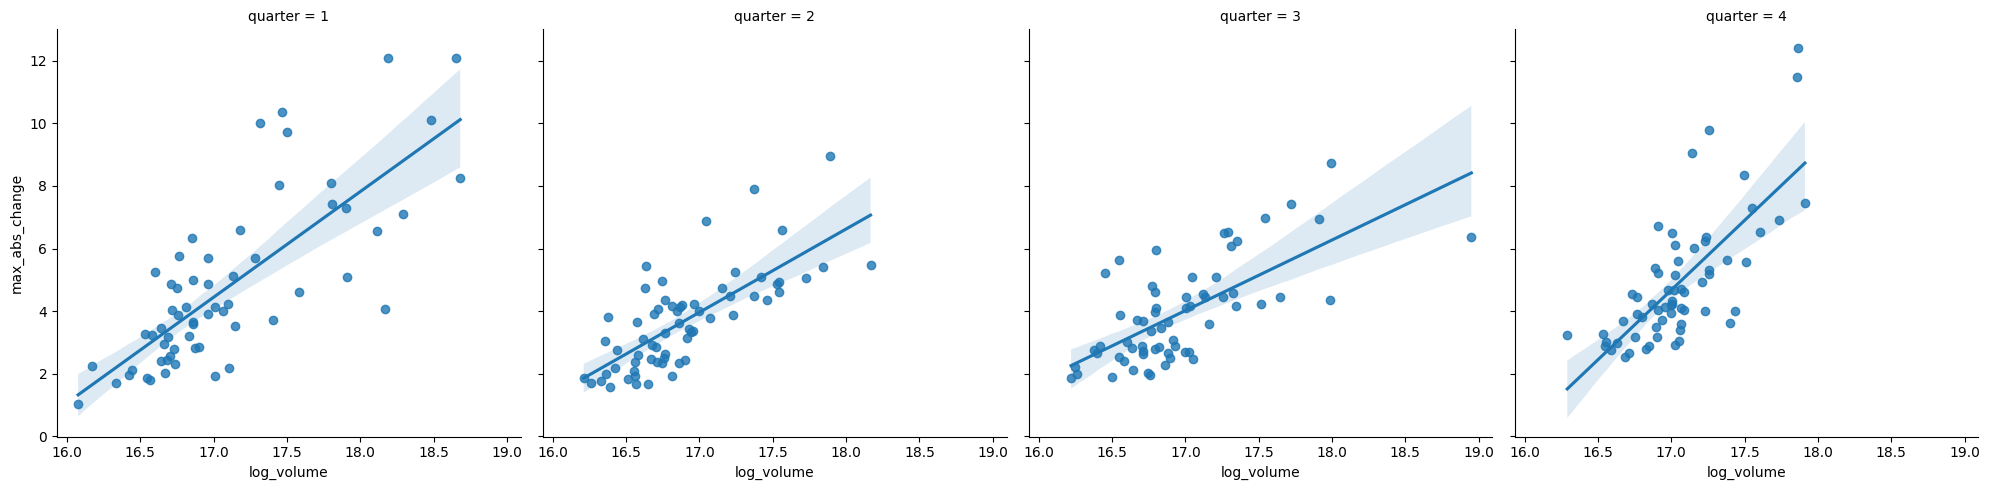

In [32]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

## Facetamento

Podemos criar subplots para subconjuntos dos nossos dados usando o facetamento. Primeiro, criamos um `FacetGrid` especificando como dispor os gráficos (qual coluna categórica vai ao longo das linhas e qual vai ao longo das colunas). Em seguida, chamamos o método `map()` do `FacetGrid` e passamos a função de plotagem que queremos usar (junto com quaisquer argumentos adicionais).

Vamos usar um facet grid para mostrar a distribuição das magnitudes de terremotos na Indonésia e Papua Nova Guiné por `tsunami` e `parsed_place`:

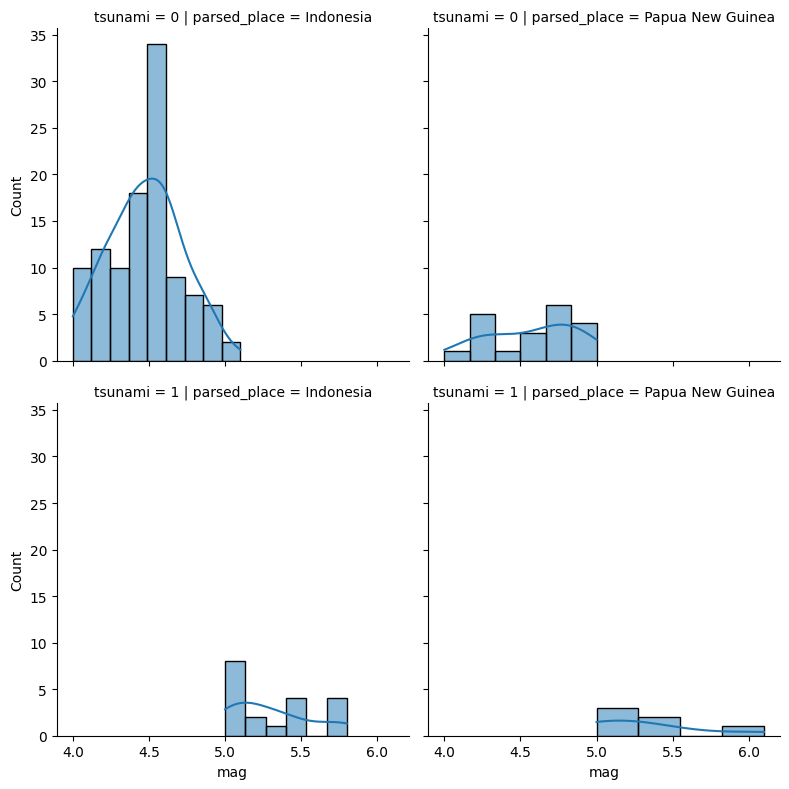

In [35]:
g = sns.FacetGrid(
    quakes.query(
        'parsed_place.isin(["Indonesia", "Papua New Guinea"]) '
        'and magType == "mb"'
    ),
    row='tsunami',
    col='parsed_place',
    height=4
)
g = g.map(sns.histplot, 'mag', kde=True)

<hr>
<div>
    <a href="../ch_05/3-pandas_plotting_module.ipynb">
        <button>&#8592; Chapter 5</button>
    </a>
    <a href="./2-formatting_plots.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>